<a href="https://colab.research.google.com/github/khalilchaouali/Forcasting-Store-Sales/blob/main/Forcasting_Store_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
import pandas as pd

In [86]:
data_store=pd.read_excel('/content/Sample - Superstore.xls')

In [87]:
data_store.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [88]:
data_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

`we don't need to to make the data cleaning part`

In [89]:
data_store.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


when we focus at the profit column we can notice that sometimes the store lose in some product until 6599.978000


we have a lot of category and we are going to start with the furniture 

In [90]:
Furniture=data_store.loc[data_store['Category']=='Furniture']

In [91]:
Furniture.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
10,11,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [92]:
Furniture['Order Date'].min().year,Furniture['Order Date'].max().year

(2014, 2017)

As we see here that we have a good sell of furniture between 2014 and 2017 so we et agood 4 years furniture sell 

In [93]:
Furniture.groupby('Region').count()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Region,,,,,,,,,,,,,,,,,,,,
Central,481,481,481,481,481,481,481,481,481,481,481,481,481,481,481,481,481,481,481,481
East,601,601,601,601,601,601,601,601,601,601,601,601,601,601,601,601,601,601,601,601
South,332,332,332,332,332,332,332,332,332,332,332,332,332,332,332,332,332,332,332,332
West,707,707,707,707,707,707,707,707,707,707,707,707,707,707,707,707,707,707,707,707


`Most of the ship  went to the west ans the east`


---

# Preprocessing part :
to select important column for our current study


In [94]:
Furniture.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [95]:
unuseful_Column=['Row ID', 'Order ID',  'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Quantity', 'Discount', 'Profit']

In [96]:
Furniture.drop(unuseful_Column,axis=1,inplace=True)

In [97]:
Furniture.head()

,Order Date,Sales
0,2016-11-08,261.9600
1,2016-11-08,731.9400
3,2015-10-11,957.5775
5,2014-06-09,48.8600
10,2014-06-09,1706.1840


In [98]:
Furniture=Furniture.groupby('Order Date')['Sales'].sum().reset_index()

In [99]:
Furniture

,Order Date,Sales
0,2014-01-06,2573.8200
1,2014-01-07,76.7280
2,2014-01-10,51.9400
3,2014-01-11,9.9400
4,2014-01-13,879.9390
...,...,...
884,2017-12-24,1393.4940
885,2017-12-25,832.4540
886,2017-12-28,551.2568
887,2017-12-29,2330.7180


**Here we made the sum of each order,so as a consequence we get the sales of each data of the furniture  **









In [100]:
Furniture=Furniture.set_index('Order Date')

this is we used to apply resampling method ,is you want to understand and take examples of resampling method go here [Resampling method](https://benalexkeen.com/resampling-time-series-data-with-pandas/)

In [101]:
Furniture

,Sales
Order Date,
2014-01-06,2573.8200
2014-01-07,76.7280
2014-01-10,51.9400
2014-01-11,9.9400
2014-01-13,879.9390
...,...
2017-12-24,1393.4940
2017-12-25,832.4540
2017-12-28,551.2568


In [102]:
Furniture_monthly=Furniture.resample('M').mean()

Here with this action we want to see the mean of th weakly Furniture selling

In [103]:
Furniture_monthly.head()

,Sales
Order Date,
2014-01-31,480.194231
2014-02-28,367.931600
2014-03-31,857.291529
2014-04-30,567.488357
2014-05-31,432.049187


In [104]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

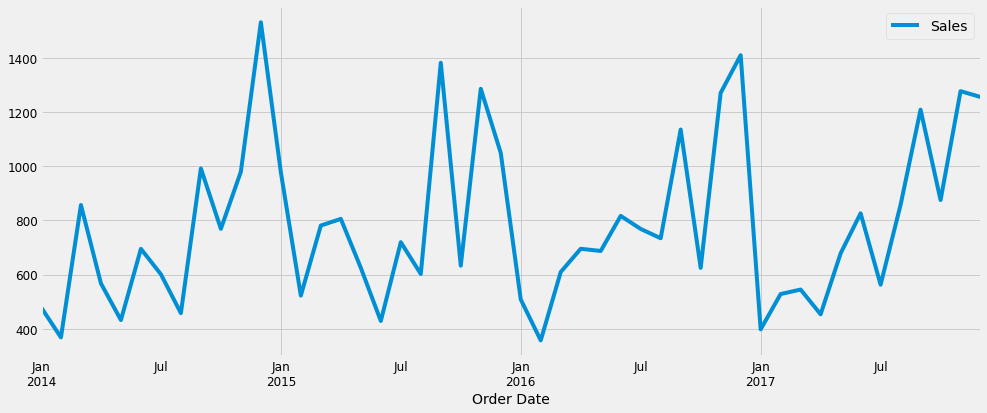

In [105]:
Furniture_monthly.plot(figsize=(15, 6))
plt.show()

**what we interpret here ???**


1.   At every start of year we see that the sell of the furnitures are so import 
2.   At every end of year we see a fall in  the sell of the furnitures 



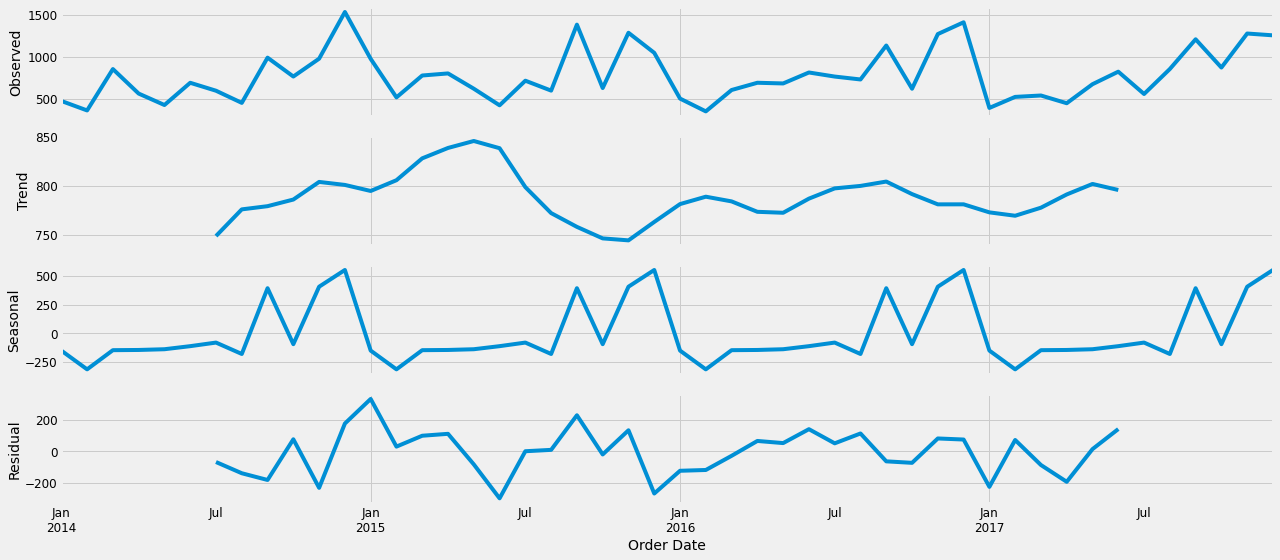

In [106]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(Furniture_monthly, model='additive')
fig = decomposition.plot()
plt.show()

**As we see that the sales of Forniture is unstable that's what we can see **

> a good resource to help understand [seasonal_decompose](https://towardsdatascience.com/time-series-decomposition-and-statsmodels-parameters-69e54d035453)



In [107]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [108]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
      try:
        mod = sm.tsa.statespace.SARIMAX(Furniture_monthly,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
        results = mod.fit()
        print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
      except:
        continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:769.0817523205916
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1478.4829845115771
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:477.71701309202774
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:497.2314433418337
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1284.058367274109
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:318.0047199116341
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:720.9252270758101
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:3151.7661575378966
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:466.56074298091676
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:499.58288234908053
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:354243.3332148463
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:319.9884876946871
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:677.894766859465
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1337.3478246551238
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:486.63785671879367
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:497.78896630044073
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1288.7471922943844
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:319.7714068109211
AR

the minimum AIC is the best one so we gonna use 

*   ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:297.78754395408083




In [109]:
mod = sm.tsa.statespace.SARIMAX(Furniture_monthly,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0146      0.342      0.043      0.966      -0.655       0.684
ma.L1         -1.0000      0.360     -2.781      0.005      -1.705      -0.295
ar.S.L12      -0.0253      0.042     -0.609      0.543      -0.107       0.056
sigma2      2.958e+04   1.22e-05   2.43e+09      0.000    2.96e+04    2.96e+04


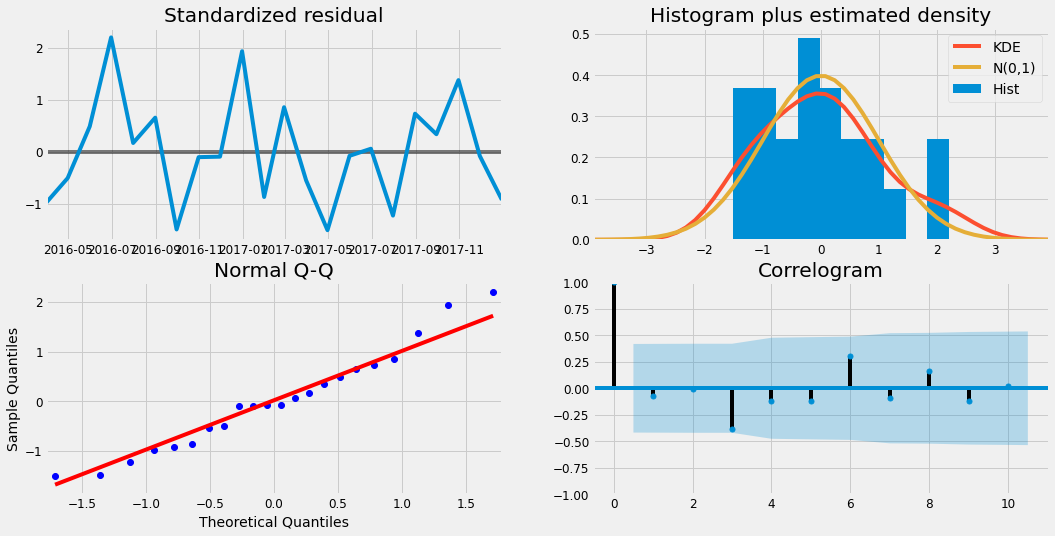

In [110]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

we can see that the resdual is near to normally distrubited 

# Validation forcast 
In this section we will try to understand how good our model in forcationg the  sales:


>  By comparing the predicted result to the real result .
So Let's Goooo!!
and we start from 31-1-2017






In [111]:
Furniture_monthly.isnull()

,Sales
Order Date,
2014-01-31,False
2014-02-28,False
2014-03-31,False
2014-04-30,False
2014-05-31,False
2014-06-30,False
2014-07-31,False
2014-08-31,False
2014-09-30,False


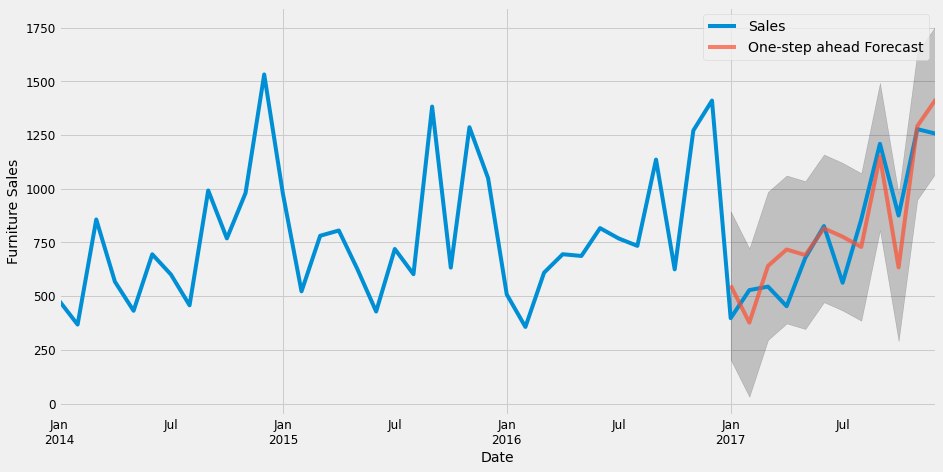

In [112]:
pred = results.get_prediction(start=pd.Timestamp('2017-01-31'), dynamic=False)
pred_ci = pred.conf_int()
ax = Furniture_monthly['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

as we see here that in the forcasted values have the same caracterestique of the original values

> showing an upward trend starts from the beginning of the year and captured the seasonality toward the end of the year.



In [113]:
y_forecasted = pred.predicted_mean
y_truth = Furniture_monthly['2017-01-31':]
from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(y_truth,y_forecasted)
rmse=sqrt(mse)
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 2)))

The Mean Squared Error of our forecasts is 22993.57
The Root Mean Squared Error of our forecasts is 151.64


In [114]:
Furniture_monthly.describe()

,Sales
count,48.000000
mean,784.081373
std,306.873209
min,356.868273
25%,558.061703
50%,707.539737
75%,978.801722
max,1532.298325


While the rmse is the erreur  of our furniture sales it's **151,64** or the values of sales are between 356 and 1530 so erroe of +-151 it's not bad so by this result we can be sure that our model is good

# Time Series of Furniture vsTechnology

In [115]:
data_store['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [116]:
Technology=data_store.loc[data_store['Category']=='Technology']

In [117]:
Technology=Technology.set_index('Order Date')

In [118]:
Technology=Technology.sort_index()

In [119]:
Technology=Technology.drop(unuseful_Column,axis=1)

In [120]:
Technology_Monthly=Technology.resample('M').sum()

In [121]:
Technology_Monthly.rename(columns = {'Sales': 'Technology_sales'}, inplace = True)

In [122]:
Furniture_monthly.rename(columns = {'Sales': 'Furniture_sales'}, inplace = True)

In [123]:
Furniture_Technology_MonthlySales=pd.concat([Technology_Monthly, Furniture_monthly.reindex(Technology_Monthly.index)], axis=1)

In [124]:
Furniture_Technology_MonthlySales

,Technology_sales,Furniture_sales
Order Date,,
2014-01-31,3143.290,480.194231
2014-02-28,1608.510,367.931600
2014-03-31,32511.174,857.291529
2014-04-30,9195.434,567.488357
2014-05-31,9599.876,432.049187
2014-06-30,8435.965,695.059242
2014-07-31,8004.134,601.169500
2014-08-31,9209.660,457.521656
2014-09-30,30537.572,992.353367


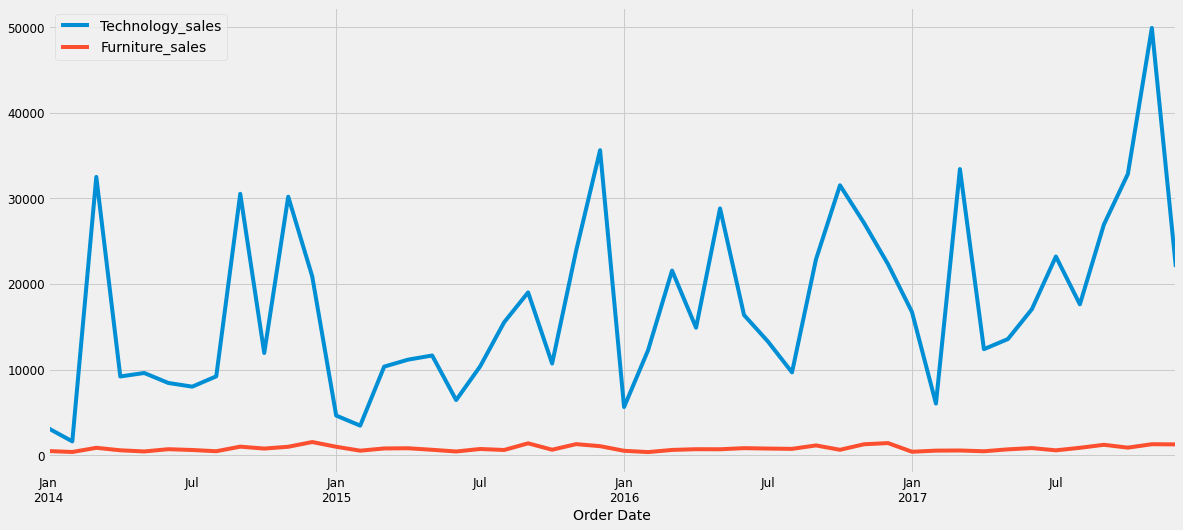

In [125]:
Furniture_Technology_MonthlySales.plot(y=['Technology_sales','Furniture_sales'])

Guess what's the problem ?

*   the sales of Technology is more big than the furniture 
*  cause is more expensive
Thant's why we need in preprocessing part understand our data and of data viz techniques should we use is the box plot 
So our solution will be Standarization >>>>


In [126]:
from sklearn.preprocessing import StandardScaler
Furniture_Technology_MonthlySales[['Technology_sales','Furniture_sales']] = StandardScaler().fit_transform(Furniture_Technology_MonthlySales[['Technology_sales','Furniture_sales']])

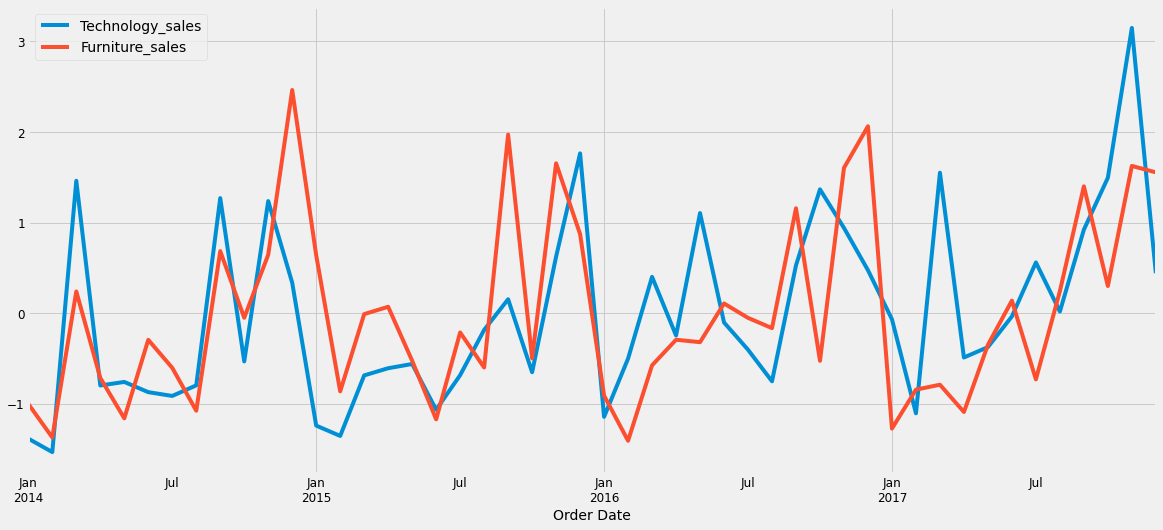

In [127]:
Furniture_Technology_MonthlySales.plot(y=['Technology_sales','Furniture_sales'])

as we see that that both category have the same up an down sales variation in each season<br>


showing an upward trend starts from the beginning of the year and captured the seasonality toward the end of the year 

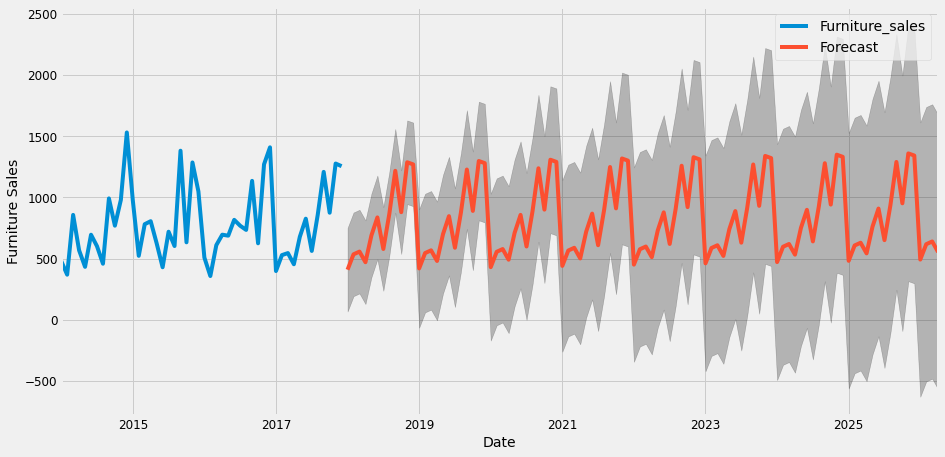

In [128]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = Furniture_monthly.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

# Forcasting using Prophet Model 
** **
> **Now we gonna use Prophet model to forcast our Furniture**



In [129]:
from fbprophet import Prophet

**Now we are going to rename our column to ds and y .<br> The Prophet understand the data by ds and the target by y but before going forward in our work we need to reset our index**

In [130]:
Furniture_monthly

,Furniture_sales
Order Date,
2014-01-31,480.194231
2014-02-28,367.931600
2014-03-31,857.291529
2014-04-30,567.488357
2014-05-31,432.049187
2014-06-30,695.059242
2014-07-31,601.169500
2014-08-31,457.521656
2014-09-30,992.353367


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<Figure size 1296x432 with 0 Axes>

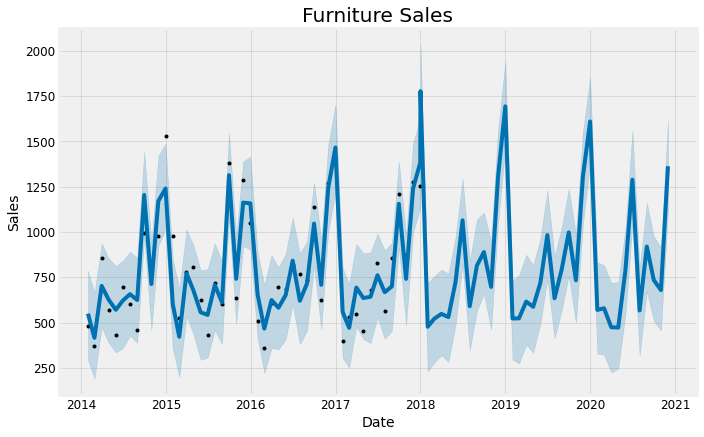

In [144]:
Furniture_monthly.reset_index(inplace=True)
furniture = Furniture_monthly.rename(columns={'Order Date': 'ds', 'Furniture_sales': 'y'})
furniture_model = Prophet(interval_width=0.95)
furniture_model.fit(furniture)
furniture_forecast = furniture_model.make_future_dataframe(periods=36, freq='MS')
furniture_forecast = furniture_model.predict(furniture_forecast)
plt.figure(figsize=(18, 6))
furniture_model.plot(furniture_forecast, xlabel = 'Date', ylabel = 'Sales')
plt.title('Furniture Sales');

Here you can discover more about the different function of the prophet librairies >>[Prophet](https://facebook.github.io/prophet/docs/quick_start.html#python-api)<br><br>Thanks fo your time to take to get understand step by step but don't forget there is a lot to discover !Have a nice Day 